In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline


In [ ]:
## Chargement des données de modélisation

In [24]:
df = pd.read_csv("../../data/processed/lieu-compteur-classes-one-hot-encoded.csv", index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204344 entries, 57773 to 1039253
Data columns (total 76 columns):
 #   Column                                                                 Non-Null Count    Dtype 
---  ------                                                                 --------------    ----- 
 0   Jour                                                                   1204344 non-null  int64 
 1   Mois                                                                   1204344 non-null  int64 
 2   Année                                                                  1204344 non-null  int64 
 3   Heure                                                                  1204344 non-null  int64 
 4   Jour_semaine                                                           1204344 non-null  int64 
 5   Jour férié                                                             1204344 non-null  int64 
 6   Vacances scolaires                                                     1204

In [2]:
## Renommage des classes et processing variables catégorielles

In [25]:
y = df["Comptage horaire"].replace({
    "0-3": "[00] 0-3",
    "4-9": "[01] 4-9",
    "10-18": "[02] 10-18",
    "19-31": "[03] 19-31",
    "32-46": "[04] 32-46",
    "47-64": "[05] 47-64",
    "65-86": "[06] 65-86",
    "87-115": "[07] 87-115",
    "116-155": "[08] 116-155",
    "156-230": "[09] 156-230",
    "231-450": "[10] 231-450",
    "451+": "[11] 451+",
})
X = df.drop(columns=["Comptage horaire"])

col_norm = ["Jour", "Mois", "Année", "Heure", "Jour_semaine", "Jour férié", "Vacances scolaires"]
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int) 

array = encoder.fit_transform(X[col_norm])

encoded_df_clean = pd.DataFrame(array, columns=encoder.get_feature_names_out(col_norm))

encoded_df_clean.index = X.index

X_clean = pd.concat([X.drop(columns=col_norm), encoded_df_clean], axis=1)

In [26]:
X_clean.head()

,Nom du site de comptage_10 avenue de la Grande Armée,Nom du site de comptage_10 boulevard Auguste Blanqui,Nom du site de comptage_102 boulevard de Magenta,Nom du site de comptage_106 avenue Denfert Rochereau,Nom du site de comptage_129 rue Lecourbe,Nom du site de comptage_132 rue Lecourbe,Nom du site de comptage_135 avenue Daumesnil,Nom du site de comptage_147 avenue d'Italie,Nom du site de comptage_152 boulevard du Montparnasse,Nom du site de comptage_16 avenue de la Porte des Ternes,...,Jour_semaine_2,Jour_semaine_3,Jour_semaine_4,Jour_semaine_5,Jour_semaine_6,Jour_semaine_7,Jour férié_0,Jour férié_1,Vacances scolaires_0,Vacances scolaires_1
57773,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1092998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1171485,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
57487,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
57812,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
## Encodage variable cible

In [27]:
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

In [28]:
y

array([11, 11, 11, ...,  0,  0,  0])

In [ ]:
## Séparation datasets d'entrainement et de test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [ ]:
## Grid Search CV

In [19]:
params = {
    "criterion": ["gini"],
    "max_depth": [70],
    "min_samples_split": [2, 10, 15],
    "min_samples_leaf": [2],
    "max_features": [None, 'sqrt', 'log2'],
}

In [20]:
t_clf = DecisionTreeClassifier()
clf = GridSearchCV(t_clf, params, scoring='accuracy', n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)
print("best params", clf.best_params_)
print("best score", clf.best_score_)
print("train score", clf.score(X_train, y_train))
print("test score", clf.score(X_test, y_test))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
best params {'criterion': 'gini', 'max_depth': 70, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 15}
best score 0.5076073587794183
train score 0.6491398323775915
test score 0.5111326073508837


In [ ]:
## Entrainement du modèle avec valeurs optimales

In [31]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=15)
clf.fit(X_train, y_train)
print("train score", clf.score(X_train, y_train))
print("test score", clf.score(X_test, y_test))

train score 0.6491118088170424
test score 0.5089779091539385


In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_test = label_enc.inverse_transform(y_test)
y_pred = label_enc.inverse_transform(y_pred)

In [ ]:
## Matrice de confusion

In [39]:
matrice_confusion = pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'])
matrice_confusion

Classes prédites,[00] 0-3,[01] 4-9,[02] 10-18,[03] 19-31,[04] 32-46,[05] 47-64,[06] 65-86,[07] 87-115,[08] 116-155,[09] 156-230,[10] 231-450,[11] 451+
Classes réelles,,,,,,,,,,,,
[00] 0-3,15867,4034,654,282,139,154,163,170,90,95,89,28
[01] 4-9,4801,10730,4100,649,114,60,45,44,27,21,13,2
[02] 10-18,678,5003,9181,4402,708,210,86,59,31,29,10,1
[03] 19-31,178,677,4315,9954,4113,1196,373,211,69,43,11,4
[04] 32-46,122,85,685,4888,7859,4479,1420,695,141,65,14,3
[05] 47-64,115,32,147,1101,4314,7909,4869,2082,456,103,28,4
[06] 65-86,74,21,46,261,1004,4360,7938,5453,1271,287,64,4
[07] 87-115,46,14,25,87,269,1073,4918,9911,3863,864,147,13
[08] 116-155,72,7,12,31,98,259,1239,6743,8023,3474,472,17


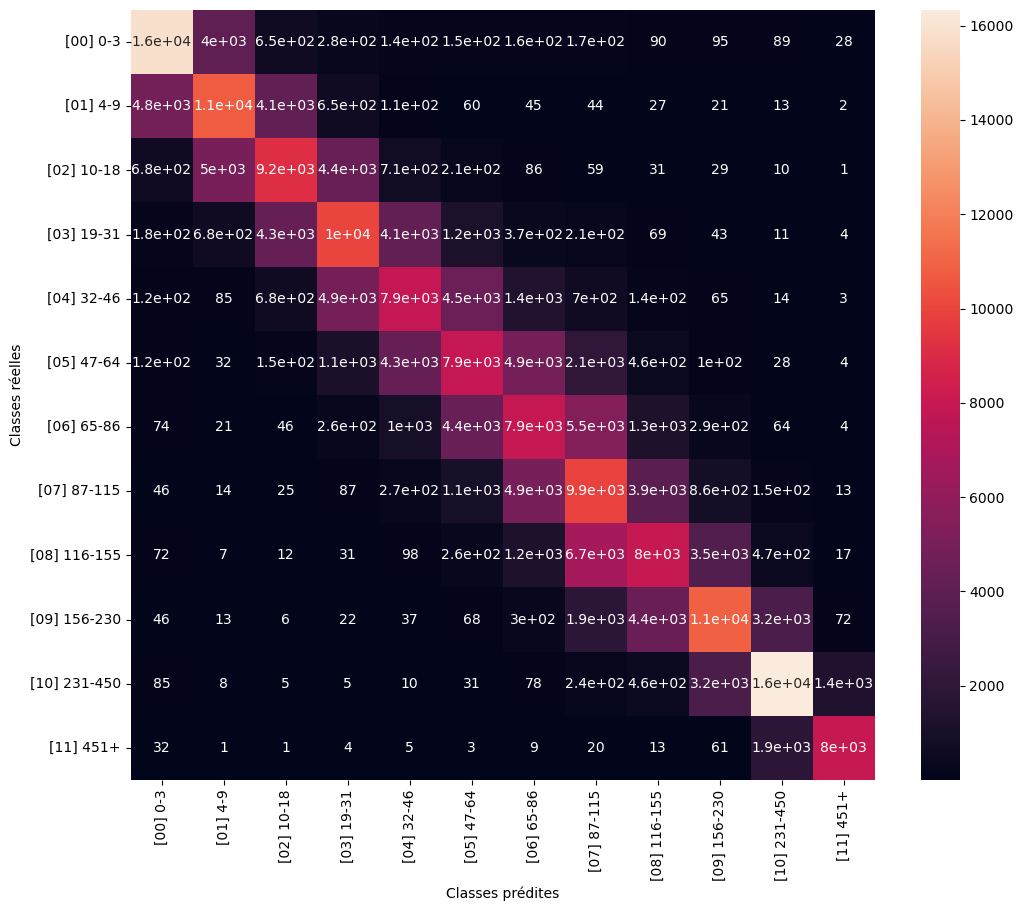

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(matrice_confusion, annot=True)
plt.show()

In [ ]:
## Rapport de classification

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    [00] 0-3       0.72      0.73      0.72     21765
    [01] 4-9       0.52      0.52      0.52     20606
  [02] 10-18       0.48      0.45      0.46     20398
  [03] 19-31       0.46      0.47      0.46     21144
  [04] 32-46       0.42      0.38      0.40     20456
  [05] 47-64       0.40      0.37      0.39     21160
  [06] 65-86       0.37      0.38      0.38     20783
 [07] 87-115       0.36      0.47      0.41     21230
[08] 116-155       0.42      0.39      0.41     20447
[09] 156-230       0.57      0.52      0.54     20928
[10] 231-450       0.73      0.75      0.74     21875
   [11] 451+       0.84      0.80      0.82     10077

    accuracy                           0.51    240869
   macro avg       0.52      0.52      0.52    240869
weighted avg       0.51      0.51      0.51    240869

